In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd '/content/drive/My Drive/TrueCue/'

Mounted at /content/drive
/content/drive/My Drive/TrueCue


#TrueCue WiD Hackathon

Initial data exploration and investigation of world population cartogram

Alison Davey
14 October 2020

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.lines import Line2D
import matplotlib

In [4]:
df=pd.read_csv('from_TrueCue/COVID19 Hackathon Dataset.csv')
len(df)

41782

In [5]:
len(df[df.Date=='2019-12-31']),len(df[df.Date=='2020-06-01']),len(df[df.Date=='2020-10-07']) # up to 180 countries, not all countries every day

(64, 180, 178)

In [6]:
set(df[df.Date=='2020-06-01'].Countries)-set(df[df.Date=='2020-10-07'].Countries) 
# 2 countries unreported data on 2020-10-07. Could get up-to-date data from 'Our World in Data'

{'Spain', 'Sweden'}

In [7]:
set(df[df.Date=='2020-06-01'].Countries)-set(df[df.Date=='2020-10-06'].Countries)

set()

In [8]:
df.tail().T

,41777,41778,41779,41780,41781
Date,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07
Continent,Africa,Africa,Africa,Africa,Africa
Countries,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe,Zimbabwe
New_Cases,8,27,0,13,17
New_Deaths,0,0,0,0,1
Total_Cases,7858,7885,7885,7898,7915
Total_Deaths,228,228,228,228,229
Weekly_Cases,71,82,73,82,78
Weekly_Deaths,1,1,1,0,1
Population_Density,38.4,38.4,38.4,38.4,38.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41782 entries, 0 to 41781
Data columns (total 37 columns):
 #   Column                                                                                               Non-Null Count  Dtype  
---  ------                                                                                               --------------  -----  
 0   Date                                                                                                 41782 non-null  object 
 1   Continent                                                                                            41782 non-null  object 
 2   Countries                                                                                            41782 non-null  object 
 3   New_Cases                                                                                            41506 non-null  float64
 4   New_Deaths                                                                                           41506

In [10]:
df.Countries.nunique(), df.Country.nunique(),df['Country Code'].nunique()

(180, 173, 173)

In [11]:
lst=sorted(list(set(df.Countries)-set(df.Country)))
lst 
# Some data but no 'Country Code'
# Add ISO-3166 country code (need this later to match to world map)

['Liechtenstein',
 'Monaco',
 'Palestine',
 'Papua New Guinea',
 'San Marino',
 'South Sudan',
 'St. Kitts and Nevis']

In [12]:
ISO_alpha_3 = ['LIE', 'MCO', 'PSE', 'PNG', 'SMR', 'SSD', 'KNA']
for i, ctry in enumerate(lst):
  df.loc[df.Countries==ctry, 'Country Code']=ISO_alpha_3[i]

In [13]:
df[df.Countries=='Monaco'].iloc[0,]

Date                                                                                                   2019-12-31
Continent                                                                                                  Europe
Countries                                                                                                  Monaco
New_Cases                                                                                                       0
New_Deaths                                                                                                      0
Total_Cases                                                                                                     0
Total_Deaths                                                                                                    0
Weekly_Cases                                                                                                  NaN
Weekly_Deaths                                                                           

In [14]:
df[df.Date=='2019-12-31'][['Countries', 'Population']].sort_values('Population', ascending=False)

,Countries,Population
8129,China,1.397715e+09
17385,India,1.366418e+09
40013,United States,3.282395e+08
17667,Indonesia,2.706256e+08
28791,Pakistan,2.165653e+08
...,...,...
12740,Estonia,1.326590e+06
22701,Luxembourg,6.198960e+05
17103,Iceland,3.613130e+05
25180,Monaco,NaN


In [15]:
def description(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.iloc[0].values
    summary['Second Value'] = df.iloc[1].values
    summary['Third Value'] = df.iloc[2].values
    return summary

In [16]:
description(df) # 282 Dates - daily Covid19 stats

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Date,object,0,282,2019-12-31,2020-01-01,2020-01-02
1,Continent,object,0,6,Asia,Asia,Asia
2,Countries,object,0,180,Afghanistan,Afghanistan,Afghanistan
3,New_Cases,float64,276,4068,0,0,0
4,New_Deaths,float64,276,893,0,0,0
5,Total_Cases,float64,276,17646,0,0,0
6,Total_Deaths,float64,276,5972,0,0,0
7,Weekly_Cases,float64,942,9009,NaN,NaN,NaN
8,Weekly_Deaths,float64,942,2147,NaN,NaN,NaN
9,Population_Density,float64,0,165,59.6,59.6,59.6


In [17]:
description(df[df.Countries=='Spain']) # lots of columns have a single value across all dates; should make dates into columns

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value
0,Date,object,0,281,2019-12-31,2020-01-01,2020-01-02
1,Continent,object,0,1,Europe,Europe,Europe
2,Countries,object,0,1,Spain,Spain,Spain
3,New_Cases,float64,0,192,0,0,0
4,New_Deaths,float64,0,120,0,0,0
5,Total_Cases,float64,0,200,0,0,0
6,Total_Deaths,float64,0,173,0,0,0
7,Weekly_Cases,float64,6,199,NaN,NaN,NaN
8,Weekly_Deaths,float64,6,162,NaN,NaN,NaN
9,Population_Density,float64,0,1,93.7,93.7,93.7


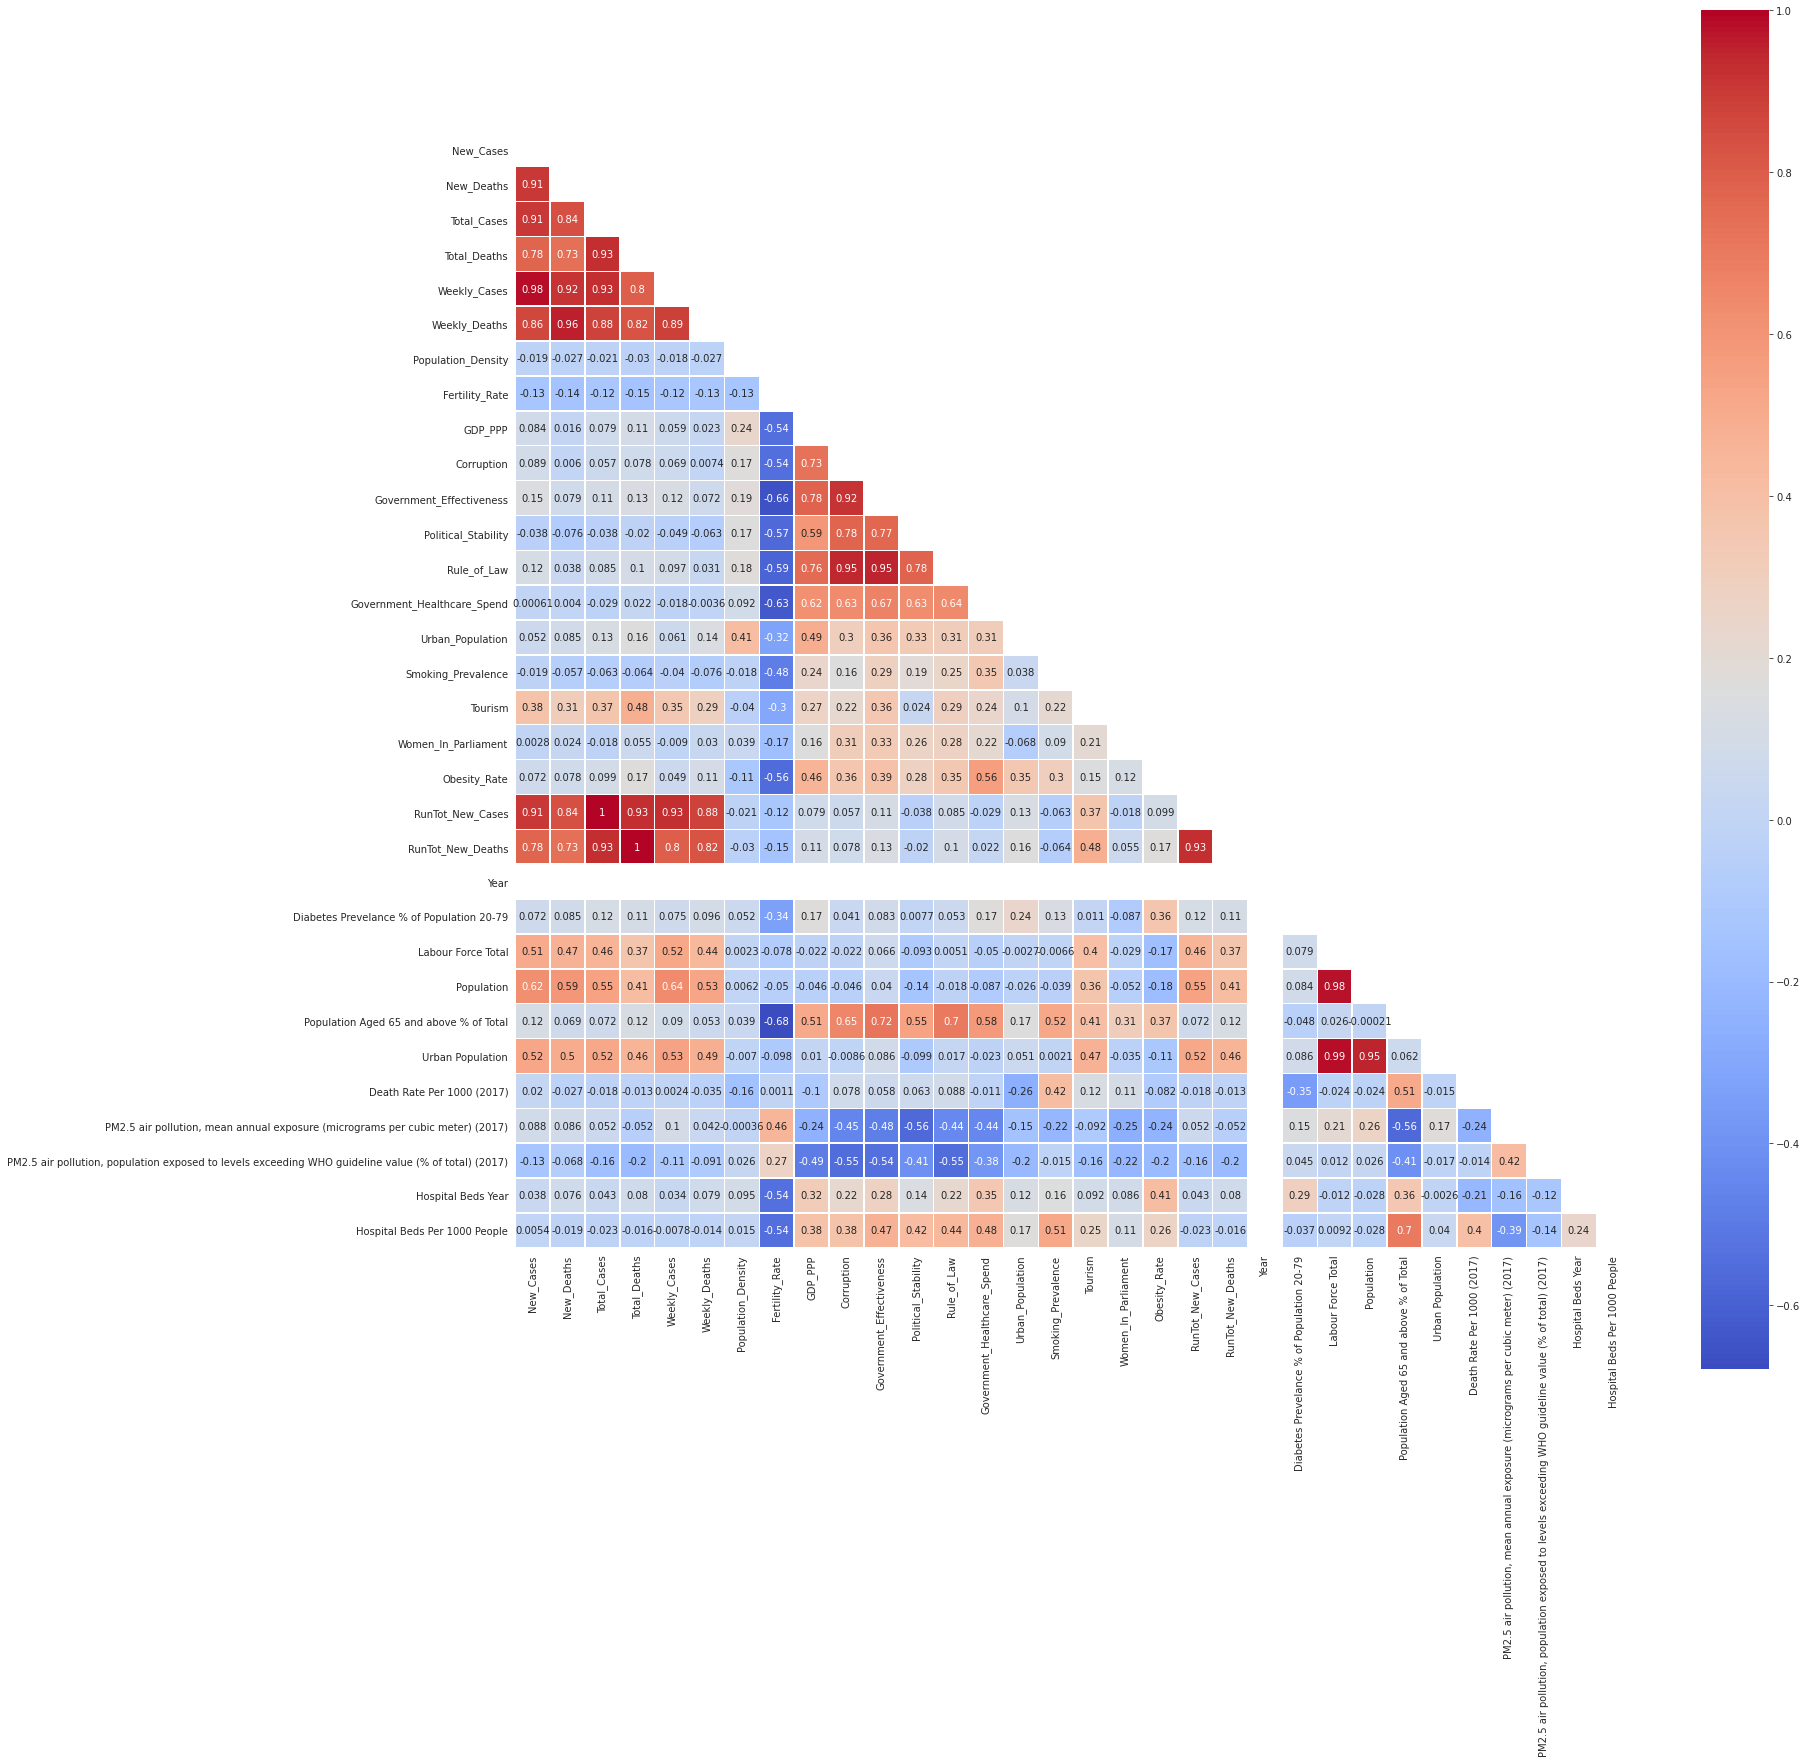

In [18]:
# correlation matrix for latest date
corr = df[df.Date=='2020-10-06'].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 25))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.5,cmap="coolwarm",annot=True)

## World Population Cartogram

https://github.com/mattdzugan/World-Population-Cartogram

"The cartogram is composed ~15,000 square* cells within a grid. **Each cell represents a population of 500,000 (0.5M) people** who reside in its corresponding country. This means that the only information necessary to represent the World Population Cartogram is a list of tuples: {X, Y, Country} describing which cells map to which countries. To avoid dealing with spelling mismatches and other localization glitches, this repo uses ISO 3166-1 country codes to identify countries."

Using a population cartogram as our world base map for Covid10 would make sense - the illness affects people, not land area.

In [19]:
borders = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/borders.csv")
cells   = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/cells.csv")

In [20]:
borders.head()

,X,Y,PolygonID,CountryCode,BorderType
0,163.0,84.0,1,792,Exterior
1,163.0,85.0,1,792,Exterior
2,162.0,85.0,1,792,Exterior
3,162.0,84.0,1,792,Exterior
4,161.0,84.0,1,792,Exterior


In [21]:
len(borders)

8079

In [22]:
cells.head()

,X,Y,CountryCode,LowerLeft,UpperRight,IncludeInSquares
0,152,87,792,1,1,1
1,152,86,792,1,1,1
2,153,88,792,1,1,1
3,153,87,792,1,1,1
4,153,86,792,1,1,1


In [23]:
len(cells), cells.CountryCode.nunique()

(15282, 213)

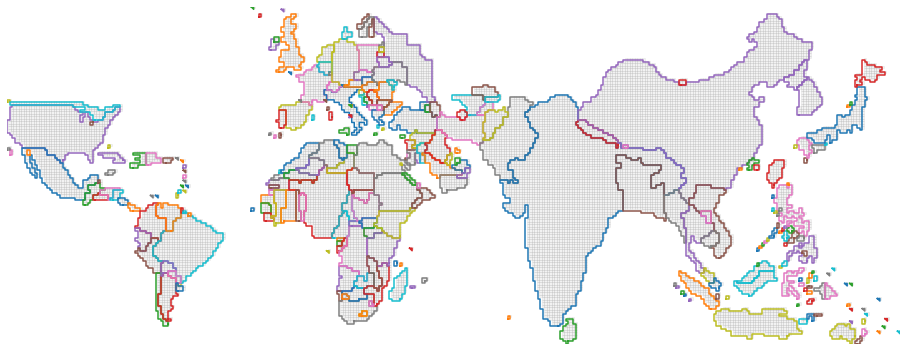

In [24]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, aspect='equal')
plt.xlim([0, max(cells["X"]+1)])
plt.ylim([0, max(cells["Y"]+1)])
n=cells.shape[0]
patches = []
for i in range(0,n):
    patches.append(matplotlib.patches.Rectangle((cells.loc[i,"X"]+.5, cells.loc[i,"Y"]+.5),1,1))
ax.add_collection(PatchCollection(patches, color='grey', alpha=0.1))
for p in np.unique(borders["PolygonID"]):
    ax.plot(borders.loc[borders["PolygonID"]==p, "X"], borders.loc[borders["PolygonID"]==p, "Y"])
plt.axis('off')
plt.show()

In [25]:
# Match ISO 3166-1 country codes to three character df['Country Code]
# Display population related data on population cartogram

In [26]:
iso_3166=pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/slim-3/slim-3.csv',
                     dtype={'name':'str','alpha-3':'str','country-code':'float64'})
df=df.merge(iso_3166, left_on='Country Code', right_on='alpha-3', how='left')
df[df.Date=='2020-10-06']['country-code'].nunique() # 180  countries

180

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


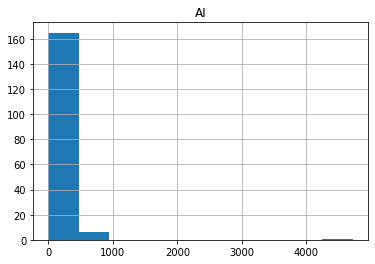

In [27]:
# Map for latest data
one_day_df = df[df.Date=='2020-10-06']
one_day_df['AI']=100_000*14*one_day_df['New_Cases']/one_day_df['Population']
# just to demonstrate the idea (should be total for past 14 days)
one_day_df.hist('AI');

In [28]:
cut_labels=['<20','20-59.9','60-119.9','120-239.9','240-499.9','>500']
cut_bins = [-1, 20., 60., 120., 240., 500., max(one_day_df['AI'])]
one_day_df['count'] = pd.cut(one_day_df['AI'], bins=cut_bins, labels=cut_labels)
color_dict={'<20':'lemonchiffon','20-59.9':'yellow','60-119.9':'orange','120-239.9':'sandybrown','240-499.9':'brown','>500':'red'}
one_day_df['color']=one_day_df['count'].map(color_dict)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
cells = pd.read_csv("https://raw.githubusercontent.com/mattdzugan/World-Population-Cartogram/master/data/year_2018__cell_500k/squares_and_triangles/cells.csv")
cells = cells.merge(one_day_df[['country-code','color']], left_on='CountryCode', right_on='country-code',how='left')
cells.color.fillna('lemonchiffon',inplace=True)

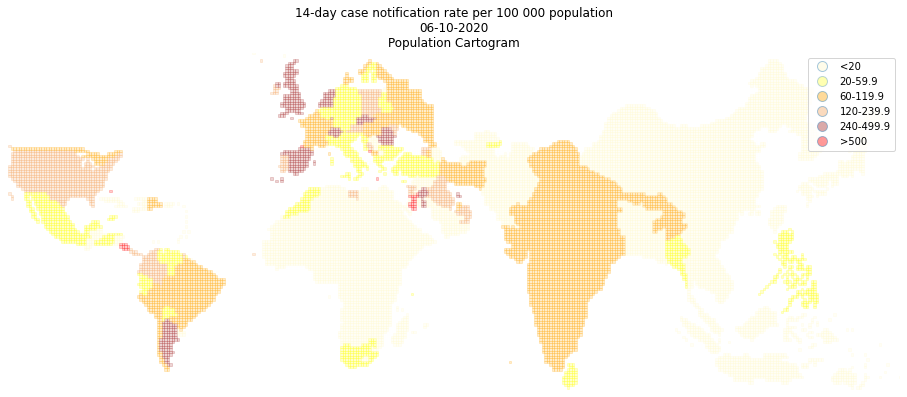

In [30]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, aspect='equal')
plt.xlim([0, max(cells["X"]+1)])
plt.ylim([0, max(cells["Y"]+1)])
n=cells.shape[0]
patches = []
for i in range(0,n):
    patches.append(matplotlib.patches.Rectangle((cells.loc[i,"X"]+.5, cells.loc[i,"Y"]+.5),1,1))
ax.add_collection(PatchCollection(patches, color=cells.color, alpha=0.2))

circ1 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.4, markersize=10, markerfacecolor="lemonchiffon")
circ2 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.3, markersize=10, markerfacecolor="yellow")
circ3 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.4, markersize=10, markerfacecolor="orange")
circ4 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.4, markersize=10, markerfacecolor="sandybrown")
circ5 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.4, markersize=10, markerfacecolor="brown")
circ6 = Line2D([0], [0], linestyle="none", marker="o", alpha=0.4, markersize=10, markerfacecolor="red")

plt.legend((circ1, circ2, circ3, circ4, circ5, circ6), ('<20','20-59.9','60-119.9','120-239.9','240-499.9','>500'), numpoints=1, loc="best")
plt.title('14-day case notification rate per 100 000 population\n06-10-2020\nPopulation Cartogram')
plt.axis('off')
plt.show()

In [31]:
# Look at 14-day case notification rate per 100 000 population by country through time, 
# make an animated graphic using the population cartogram
# https://www.ecdc.europa.eu/en/cases-2019-ncov-eueea